In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, stdev
from os import listdir
from os.path import isfile, join

# User files
from balance import QLearner

In [102]:
def plot(data):
    
    plt.figure(figsize=(16, 6))
    plt.xlabel("Step")
    plt.ylabel("Reward")
    plt.title("Rolling average")
    plt.grid(True)
    y = data
    plt.plot(y, color="#0000ff")

In [120]:
def plot_stdev(avg, std):
    
    plt.figure(figsize=(16, 6))
    plt.xlabel("Step")
    plt.ylabel("Reward")
    plt.title("Standard deviation")
    plt.grid(True)
    plt.plot([a + s for a,s in zip(avg,std)], linestyle='dashed', linewidth=2, label="Avg + stdev", color="#8595ff")
    plt.plot([a - s for a,s in zip(avg,std)], linestyle='dashed', linewidth=2, label="Avg - stdev", color="#47d7ff")
    plt.plot(avg, linestyle='solid', linewidth=4, label="Avg", color="#0000ff")
    plt.legend(loc='best')
    plt.savefig("fig1.png", bbox_inches="tight")

In [6]:
def read_data(path):
    
    with open(path, "r") as File:
        data = [float(x) for x in File.readlines()]
    return data

In [45]:
def running_avg(path, step_size = 10):
    
    data = read_data(path)
    step = 0
    step_avg = []
    while step + step_size <= len(data):
        avg = mean(data[step:step+step_size])
        step_avg.append(avg)
        step += 1
    return step_avg

In [65]:
def prepare_avg_stddev(path, should_average = True, step_size = 100):
    
    files = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
    data_all = []
    for file in files:
        if should_average == True:
            data_all.append(running_avg(file, step_size))
        else:
            data_all.append(read_data(file))

    if len(data_all[0]) != mean([len(x) for x in data_all]):
        print("WRN: Data lengths not consistent:", [len(x) for x in data_all])

    complete_data = []
    for idx in range(len(data_all[0])):
        temp = []
        for trial in data_all:
            temp.append(trial[idx])
        complete_data.append(temp)

    avg = [mean(x) for x in complete_data]
    std_dev = [stdev(x) for x in complete_data]
    return (avg, std_dev)

# Średnia krocząca

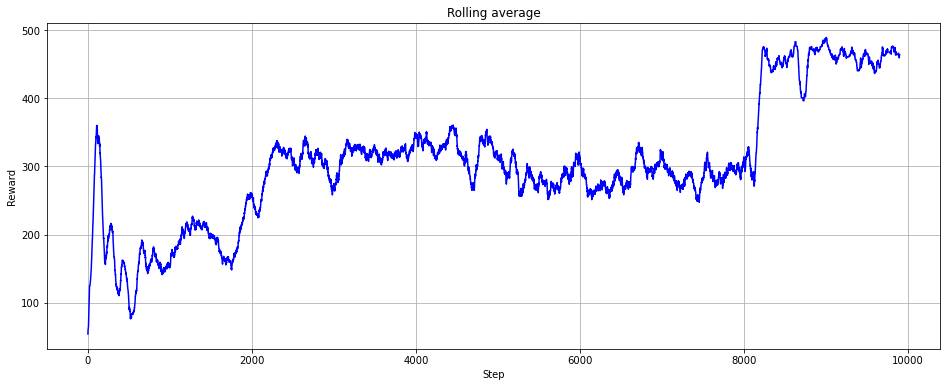

In [115]:
# path = "/home/mateusz/Studies/AGH_sem_10/MachineLearning/lab02_uczenie_ze_wzmocnieniem/albert/albert.txt"
path = "/home/mateusz/Studies/AGH_sem_10/MachineLearning/lab02_uczenie_ze_wzmocnieniem/sarsa/2"

step_avg = running_avg(path, 100)

plot(step_avg)

# Odchylenie standardowe

In [105]:
path = "/home/mateusz/Studies/AGH_sem_10/MachineLearning/lab02_uczenie_ze_wzmocnieniem/trial2"
trial2 = prepare_avg_stddev(path, step_size=500)

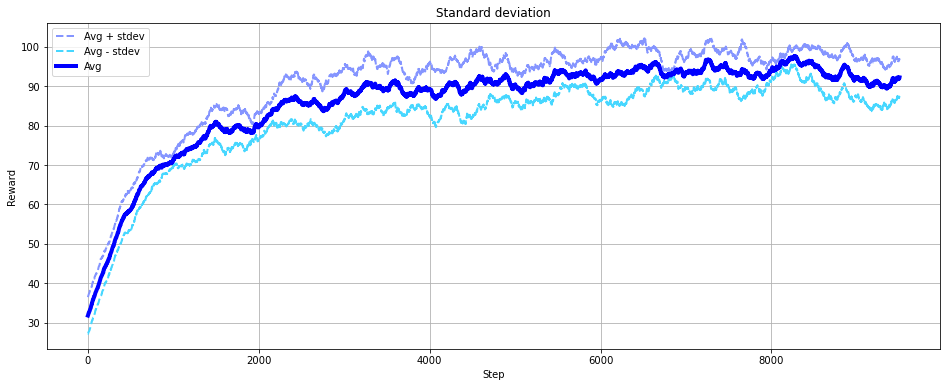

In [121]:
plot_stdev(trial2[0], trial2[1])